## 1. Set Up and Initiallization

#### 1.1 Importing the required libraries

In [153]:
import pandas as pd
import numpy as np
import os
import plotly.express as px
import matplotlib.pyplot as plt

#### 1.2 Loading the dataset and creating a pandas dataframe.

In [154]:
root_location = '../customer_segmentation/dataset/'
file_name = 'data.csv'

df = pd.read_csv(root_location + file_name, encoding='unicode_escape')

## 2. Initial Data Analysis

#### 2.1 Dataset Overview

In [155]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [156]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [157]:
df.shape

(541909, 8)

In [158]:
# Listing the names of Columns  
list(df.columns.values)

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [159]:
# Data type of each column of df
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [160]:
# printing unique values in each column
print(df.nunique())

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


In [161]:
# number of occurrence of each country
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


#### 2.2 Summary Statistics

In [162]:
# Summary statistics for numerical variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [163]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


## 3. Data Cleaning 

#### 3.1 Handling Missing Values

In [164]:
# Finding number of missing values in each column
missing_values = df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Text(0.5, 1.0, 'Percentage of missing values in each columns')

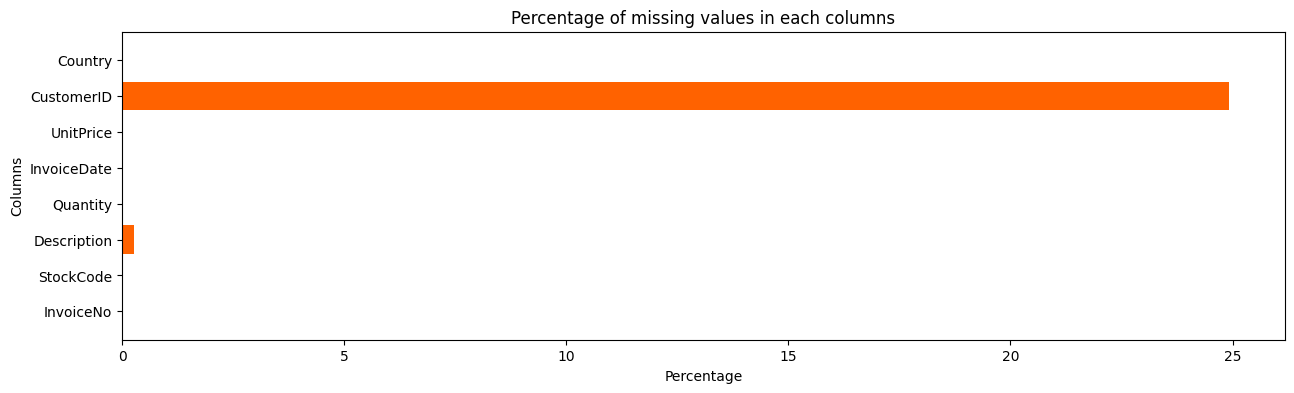

In [165]:
# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_values.index, ((missing_values/df.shape[0])*100), color='#ff6200')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.title('Percentage of missing values in each columns')

In [166]:
# Droping the missing values of all the columns
df = df.dropna() 
df.shape

(406829, 8)

In [167]:
# Making sure that there is no missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 3.2 Handling Duplicates

In [169]:
# Finding duplicate values 
df_duplicated_values = df.duplicated()
df[df_duplicated_values]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [170]:
# Total number of duplicated rows
df.duplicated().sum()

5225

In [171]:
# Number of Duplicated values of each invoice number (Other than original)
duplicated_values = df[df_duplicated_values].groupby('InvoiceNo')['CustomerID'].count()

In [172]:
duplicated_values.head(50)

InvoiceNo
536409     4
536412    13
536446     1
536464     4
536488     1
536522     2
536528     9
536530     1
536531     1
536551     4
536557     1
536559     1
536569     2
536637     8
536742     1
536749     8
536796    16
536798     2
536846     6
536863     6
536874     6
536945     4
536981     1
537042     3
537045     3
537051     5
537059     1
537111     1
537126     1
537131     1
537133     5
537136     3
537140     3
537144     9
537153     1
537154     9
537155     3
537156     2
537176     1
537192     3
537193     3
537195     1
537196    10
537199     4
537200     1
537202     5
537208     7
537210     1
537222     1
537224    17
Name: CustomerID, dtype: int64

<Axes: xlabel='InvoiceNo'>

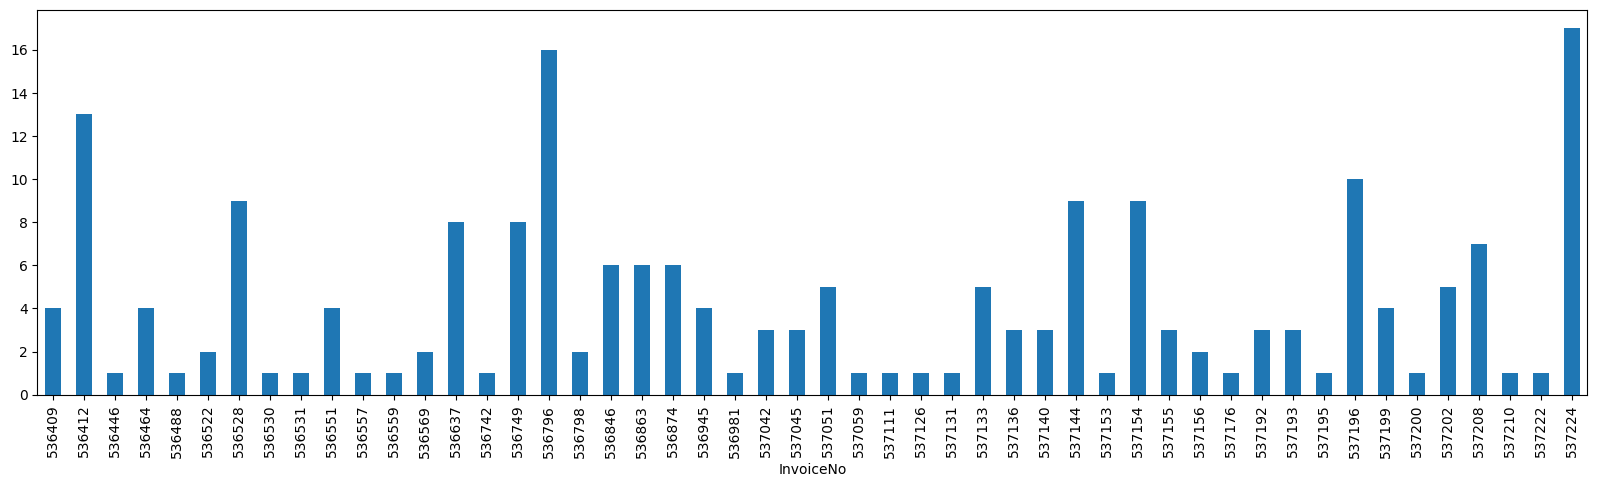

In [173]:
plt.rcParams["figure.figsize"] = (20,5)
duplicated_values[:50].plot(kind='bar')

In [174]:
duplicated_values.tail(50)

InvoiceNo
580914     1
580958     7
580982     2
580998     1
580999     2
581116     1
581125     1
581134     7
581142     5
581147     1
581149     4
581166     9
581173     3
581191     1
581237     4
581253     1
581310     1
581334     3
581345     1
581352     3
581404     1
581405     3
581412     2
581414     7
581425     3
581449     1
581450     1
581456     1
581471     1
581514     1
581538     6
C538341    9
C540535    1
C543611    3
C543837    1
C548469    1
C550165    1
C555723    1
C560855    1
C562582    1
C568370    3
C568419    1
C570099    1
C570556    3
C571893    1
C572226    1
C574095    1
C574510    1
C575940    1
C580764    1
Name: CustomerID, dtype: int64

<Axes: xlabel='InvoiceNo'>

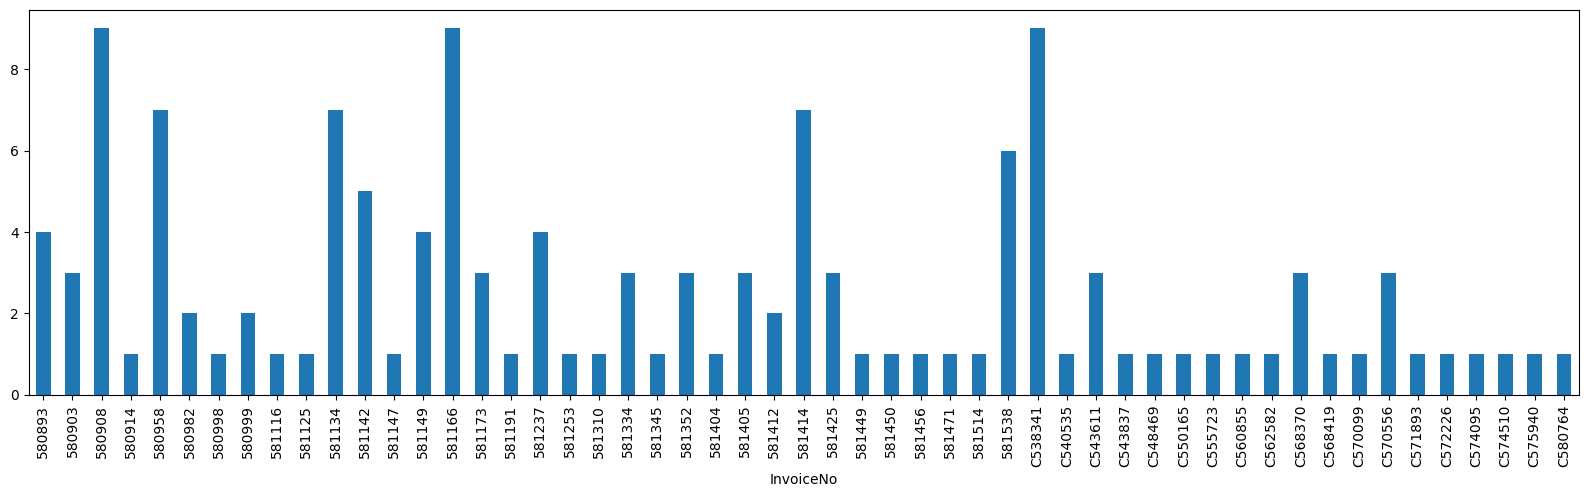

In [175]:
plt.rcParams["figure.figsize"] = (20,5)
duplicated_values[1850:1903].plot(kind='bar')


In [176]:
# Droping all the duplicated rows 
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [177]:
df.shape[0]

406829

#### 3.3 Treating Cancelled Transactions

In [178]:
# Lets first see the number of cancelled transactions
df['InvoiceNo'].str.startswith('C').sum()

8905

In [179]:
# Calculate the total number of transactions
total_transactions = len(df)

# Calculate the number of canceled transactions (those starting with 'C')
canceled_transactions = len(df[df['InvoiceNo'].str.startswith('C')])

# Calculate the percentage of canceled transactions
cancel_percentage = (canceled_transactions / total_transactions) * 100

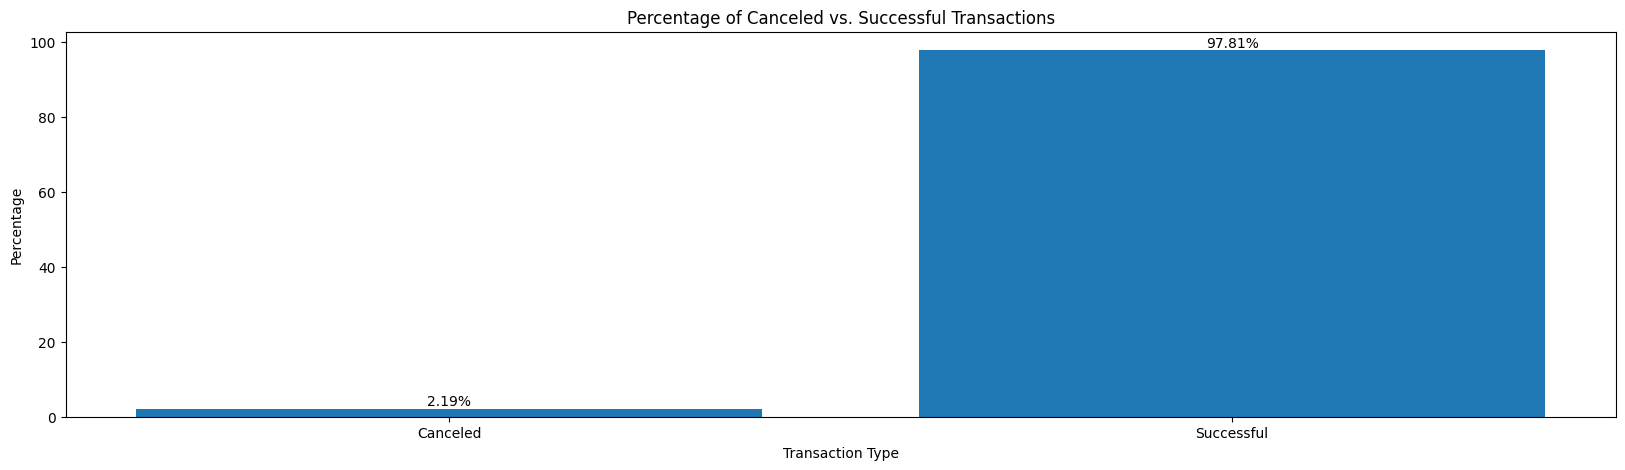

In [180]:
# Create a bar plot
plt.bar(['Canceled', 'Successful'], [cancel_percentage, 100 - cancel_percentage])
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Percentage of Canceled vs. Successful Transactions')

# Add percentage markers on top of the bars
for x, y in zip(['Canceled', 'Successful'], [cancel_percentage, 100 - cancel_percentage]):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

In [181]:
# Removing the Canceled transactions
df = df[~df['InvoiceNo'].str.startswith('C')]

In [182]:
# Making sure there is no canceled transaction
df['InvoiceNo'].str.startswith('C').sum()

0

In [183]:
df.shape[0]

397924

#### 3.4 Correcting StockCode Anomalies

In [184]:
df.shape

(397924, 8)

In [185]:
# Finding number of unique stock codes
unique_stockcodes = pd.DataFrame(df['StockCode'].unique())
len(unique_stockcodes)

3665

In [186]:
unique_stockcodes

,0
0,85123A
1,71053
2,84406B
3,84029G
4,84029E
...,...
3660,90214U
3661,90214W
3662,90214Z
3663,90089


In [188]:
#Finding the occurrence of each unique stock code
df['StockCode'].value_counts()

StockCode
85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
          ... 
90168        1
90169        1
90202A       1
90118        1
23843        1
Name: count, Length: 3665, dtype: int64

<Axes: xlabel='StockCode'>

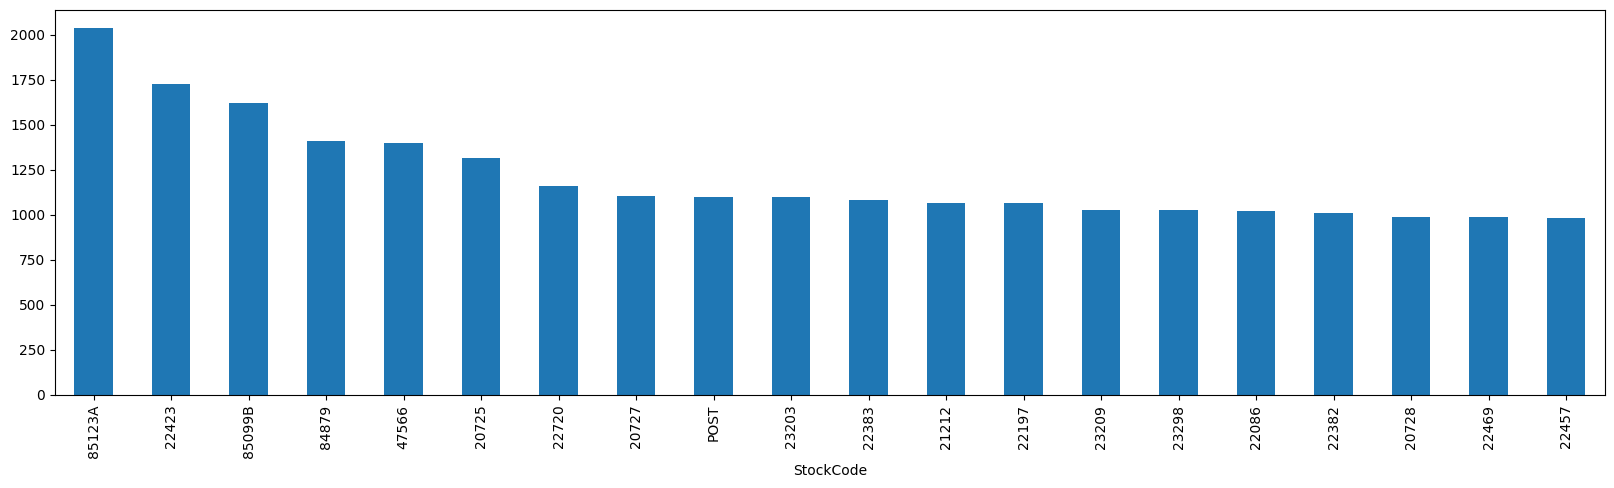

In [189]:
plt.rcParams["figure.figsize"] = (20,5)
df['StockCode'].value_counts()[:20].plot(kind='bar')

In [190]:
# Counting the lenght of unique stock stock codes
unique_stockcodes[0].apply(len).value_counts()
# Looks like stock codes with lenght upto 5 or 6 digits seems to have standard stockcodes lenght


0
5     2785
6      873
4        2
7        1
2        1
1        1
12       1
3        1
Name: count, dtype: int64

In [191]:
# Lets count the number of maximum digit in each unique stock codes 
def count_digits(string):
    return sum(item.isdigit() for item in string)

# Lets check the number of digits unique stock codes have
no_of_digits = unique_stockcodes[0].apply(count_digits)
no_of_digits.value_counts()

0
5    3659
0       5
1       1
Name: count, dtype: int64

In [265]:
anomalous_stock_codes = unique_stockcodes[(unique_stockcodes[0].str.len() == 4) | (unique_stockcodes[0].str.len() == 2) | (unique_stockcodes[0].str.len() == 1) | (unique_stockcodes[0].str.len() == 12) | (unique_stockcodes[0].str.len() == 3)]
anomalous_stockcodes = [code for code in unique_stockcodes[0] if sum(c.isdigit() for c in str(code)) in (0, 1)]
anomalous_stockcodes

['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']

In [193]:
anomalous_stockcodes_list = ['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']


In [194]:
# Counting the occurence of 
stock_codes_to_filter = ['POST', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT']
filtered_df = df[df['StockCode'].isin(stock_codes_to_filter)]
filtered_df['StockCode'].value_counts()

StockCode
POST            1099
M                290
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: count, dtype: int64

In [196]:
# Removing the anomal stock codes
df = df[~df['StockCode'].isin(anomalous_stockcodes_list)]
df.shape[0]

396370

#### 3.5 Cleaning Description Column

In [197]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
                                      ... 
MULTICOLOUR POLKADOT PLATE               1
PEARL & SHELL 42"NECKL. IVORY            1
PURPLE FRANGIPANI HAIRCLIP               1
ZINC PLANT POT HOLDER                    1
PAPER CRAFT , LITTLE BIRDIE              1
Name: count, Length: 3871, dtype: int64

<Axes: xlabel='Description'>

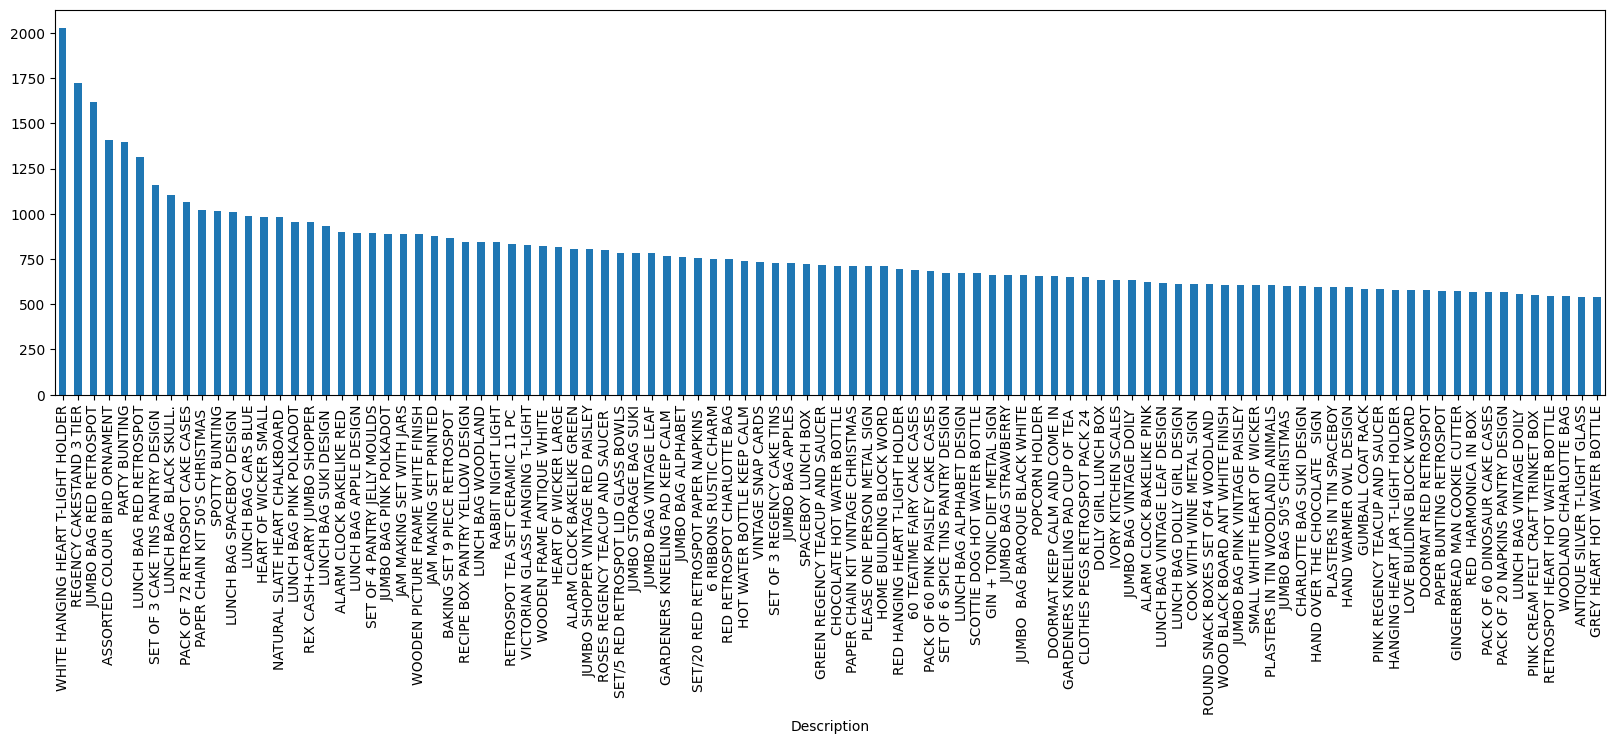

In [198]:
plt.rcParams["figure.figsize"] = (20,5)
df['Description'].value_counts()[:100].plot(kind='bar')

<Axes: xlabel='Description'>

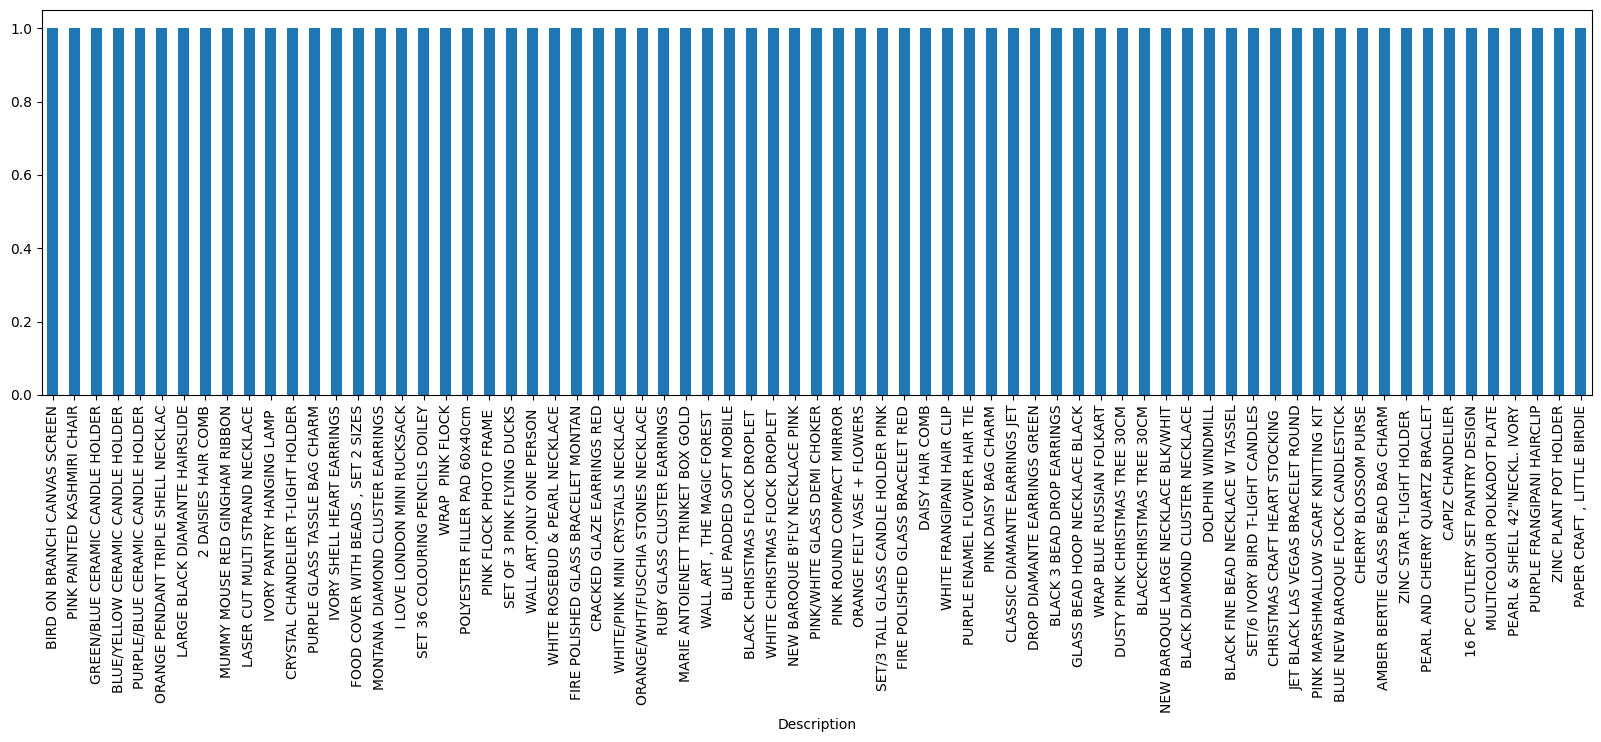

In [199]:
plt.rcParams["figure.figsize"] = (20,5)
df['Description'].value_counts()[3800:].plot(kind='bar')

In [200]:
# Apparently, all the description are in upper case, so that might be the standard form for description.
# Lets check if we have any description in lower case
unique_description = pd.DataFrame(df['Description'].unique())
plt.rcParams["figure.figsize"] = (20,5)
unique_description[unique_description[0].str.contains(r'[a-z]')]

,0
320,BAG 500g SWIRLY MARBLES
544,POLYESTER FILLER PAD 45x45cm
783,POLYESTER FILLER PAD 45x30cm
784,POLYESTER FILLER PAD 40x40cm
795,FRENCH BLUE METAL DOOR SIGN No
926,BAG 250g SWIRLY MARBLES
927,BAG 125g SWIRLY MARBLES
972,3 TRADITIONAl BISCUIT CUTTERS SET
1357,"FOLK ART GREETING CARD,pack/12"
1718,ESSENTIAL BALM 3.5g TIN IN ENVELOPE


<Axes: xlabel='0'>

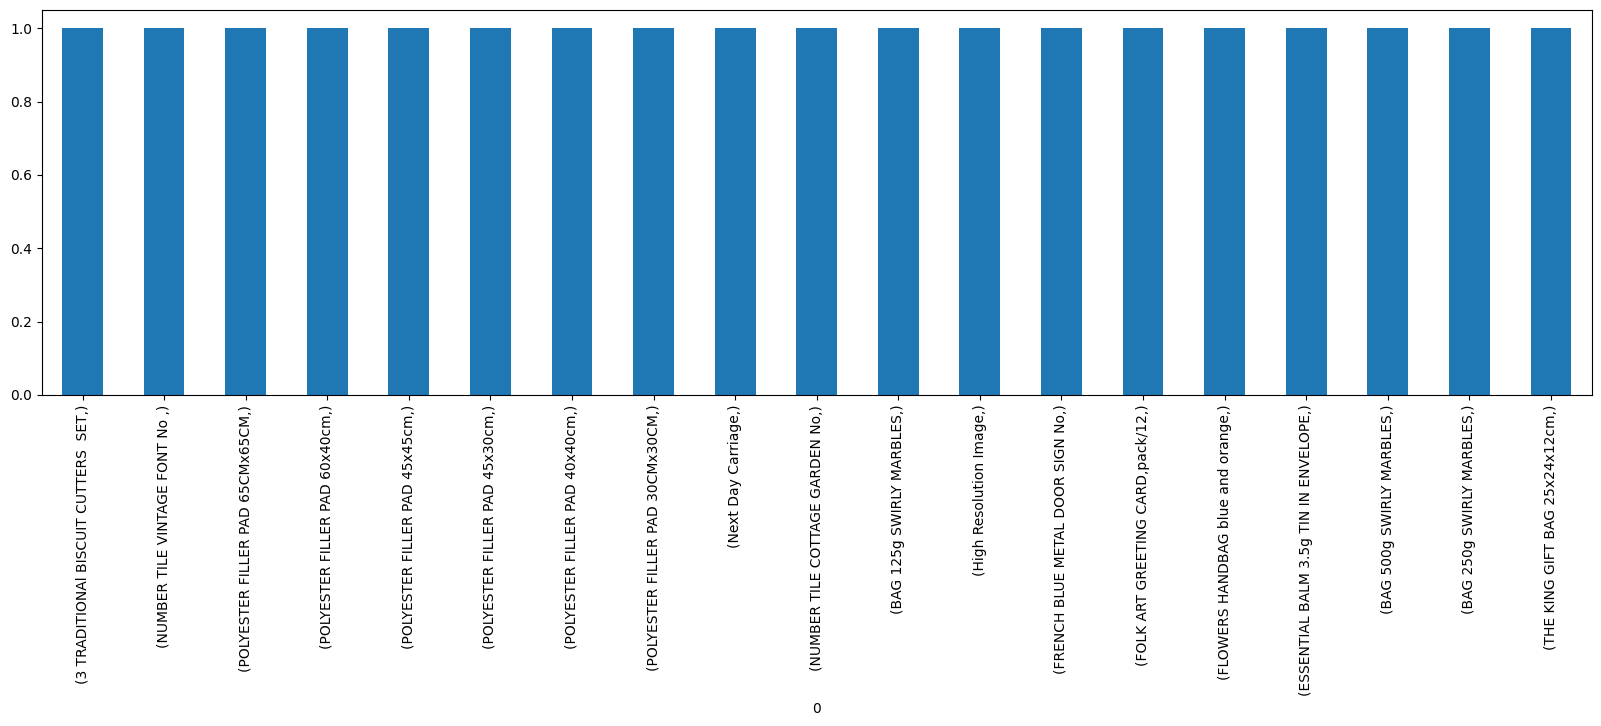

In [201]:
unique_description[unique_description[0].str.contains(r'[a-z]')].value_counts()[:20].plot(kind='bar')

In [202]:
# We have lower case letters in 19 product description. However, 2 of them seems odd - 'Next Day Carriage' and 'High Resolution Image'. So we need to drop those rows.
df = df[~df['Description'].isin(['Next Day Carriage', 'High Resolution Image'])]
df.shape[0]


396288

#### 3.6 Treating Zero Unit Prices

In [228]:
# Calculate value counts of unique unit prices
unit_price_counts = df['UnitPrice'].value_counts()

# Create a DataFrame with counts as a column
unique_unitprice = pd.DataFrame({'UnitPrice': unit_price_counts.index, 'Count': unit_price_counts.values})
unique_unitprice.sort_values(by='UnitPrice')

,UnitPrice,Count
124,0.00,33
97,0.04,66
85,0.06,111
190,0.07,7
116,0.08,45
...,...,...
142,165.00,21
315,175.00,1
174,195.00,10
187,295.00,8


In [243]:
# Here we see that there are 33 rows with '0' Unit Price. So We need to drop those rows
df = df[df['UnitPrice'] != 0]
df.shape[0]

396255

## 4. Calculating the main Features

#### 4.1 Recency

In [231]:
present_date = '2012-01-01'
present_date = pd.to_datetime(present_date)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculating the Recency (When was the last time customer brought a product from the business from the present date)
recency = df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: ((present_date-x.max()).days)})

# Renaming the Invoice date column to Recency
recency.rename(columns={"InvoiceDate": "Recency (days)"}, inplace=True)

recency


,Recency (days)
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
...,...
18280.0,299
18281.0,202
18282.0,29


#### 4.2 Frequency

In [232]:
# Calculate Frequency
frequency = df.drop_duplicates(subset='InvoiceNo').groupby(['CustomerID'])[['InvoiceNo']].count()

# Renaming the Invoice Number column to Frequency
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

frequency


,Frequency
CustomerID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


#### 4.3 Monetary

In [233]:
# Calculating the monetary value (the total amount each customer has brought to the business)
df["Total_Amount"]=df["Quantity"]*df["UnitPrice"]
monetary = df.groupby(["CustomerID"])[["Total_Amount"]].sum()

# Renaming the Total Amount column to Monetary
monetary.rename(columns={'Total_Amount': 'Monetary'}, inplace=True)

monetary

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1437.24
12349.0,1457.55
12350.0,294.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [234]:
# Creating new dataframe by merging the Recency, Frequency, Monetary Values
df_rfm = pd.concat([recency, frequency, monetary], axis=1)
df_rfm

,Recency (days),Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,7,4310.00
12348.0,97,4,1437.24
12349.0,40,1,1457.55
12350.0,332,1,294.40
...,...,...,...
18280.0,299,1,180.60
18281.0,202,1,80.82
18282.0,29,2,178.05


## 5. Calculating the RFM Scores

In [252]:
# Calculate quantiles 
quantiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
def r_score(r):
    if r <= quantiles['Recency (days)'][0.25]:
        return 4
    elif r <= quantiles['Recency (days)'][0.50]:
        return 3
    elif r <= quantiles['Recency (days)'][0.75]:
        return 2
    else:
        return 1

def fm_score(f, m):
    if f <= quantiles[m][0.25]:
        return 1
    elif f <= quantiles[m][0.50]:
        return 2
    elif f <= quantiles[m][0.75]:
        return 3
    else:
        return 4

In [253]:
# Assigning Individual Scores
df_rfm['R_Score'] = df_rfm['Recency (days)'].apply(r_score)
df_rfm['F_Score'] = df_rfm['Frequency'].apply(fm_score, args=('Frequency',))
df_rfm['M_Score'] = df_rfm['Monetary'].apply(fm_score, args=('Monetary',))

In [262]:
# Calculating RFM Score
df_rfm['RFM_Score'] = df_rfm['R_Score'] + df_rfm['F_Score'] + df_rfm['M_Score']
df_rfm

,Recency (days),Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,347,1,77183.60,1,1,4,6
12347.0,24,7,4310.00,4,4,4,12
12348.0,97,4,1437.24,2,3,3,8
12349.0,40,1,1457.55,3,1,3,7
12350.0,332,1,294.40,1,1,1,3
...,...,...,...,...,...,...,...
18280.0,299,1,180.60,1,1,1,3
18281.0,202,1,80.82,1,1,1,3
18282.0,29,2,178.05,4,2,1,7


In [263]:
df_rfm.describe()

,Recency (days),Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,114.226581,4.245270,2021.190505,2.505307,2.313106,2.500000,7.318413
std,100.175327,7.634633,8907.483348,1.121654,1.144137,1.118369,2.879878
min,22.000000,1.000000,3.750000,1.000000,1.000000,1.000000,3.000000
25%,39.000000,1.000000,305.560000,2.000000,1.000000,1.250000,5.000000
50%,72.000000,2.000000,668.075000,3.000000,2.000000,2.500000,7.000000
75%,164.000000,5.000000,1631.622500,4.000000,3.000000,3.750000,10.000000
max,395.000000,206.000000,279138.020000,4.000000,4.000000,4.000000,12.000000
